In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from bokeh.io import output_notebook
from bokeh.layouts import gridplot,row,column
from bokeh.plotting import figure, show
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
terrain = sns.color_palette(palette='terrain',n_colors=10)
plasma = sns.color_palette(palette='plasma',n_colors=10)
rainbow = sns.color_palette(palette='rainbow',n_colors=6)
output_notebook()

def get_year(date):
    x = re.match('[0-9]{4}', date)
    if x :
      return(x.group())

Loading BokehJS ...

In [27]:
pri_test = pd.read_csv(r"C:\Users\nhanw\OneDrive\Desktop\leeweesun_kaggle_2\datasets\private_test.csv")
pri_train = pd.read_csv(r"C:\Users\nhanw\OneDrive\Desktop\leeweesun_kaggle_2\datasets\private_train.csv")

In [28]:
print(pri_test.shape)
print(pri_train.shape)

(4033, 20)
(457300, 21)


## Exploring dataset

In [29]:
pri_test.head(4)

,index,project_name,address,floor_area_sqm,type_of_land,contract_date,property_type,tenure,completion_date,type_of_sale,postal_district,postal_sector,postal_code,region,area,month,latitude,longitude,floor_num,unit_num
0,3766,D'LEEDON,11 Leedon Heights #06-31,92,Strata,29-Sep-2017,Condominium,99 Yrs From 08/04/2010,2014,Resale,10,26,267955,Central Region,Bukit Timah,2017-9,1.316210,103.804388,6.0,31.0
1,3767,MERGUI MANSIONS,81 Mergui Road #03-02,129,Strata,29-Sep-2017,Apartment,Freehold,1995,Resale,8,21,219057,Central Region,Kallang,2017-9,1.317170,103.851682,3.0,2.0
2,3768,MIMOSA PARK,43 Mimosa Road #03-49,176,Strata,29-Sep-2017,Condominium,Freehold,1979,Resale,28,80,808005,North East Region,Serangoon,2017-9,1.383358,103.862457,3.0,49.0
3,3769,THE PALETTE,115 Pasir Ris Grove #03-42,46,Strata,29-Sep-2017,Condominium,99 Yrs From 20/10/2010,2015,Resale,18,51,518172,East Region,Pasir Ris,2017-9,1.369695,103.945073,3.0,42.0


In [30]:
pri_train.head(4)

,index,project_name,address,floor_area_sqm,type_of_land,price,contract_date,property_type,tenure,completion_date,...,postal_district,postal_sector,postal_code,region,area,month,latitude,longitude,floor_num,unit_num
0,0,EUPHONY GARDENS,5 Jalan Mata Ayer #01-25,95,Strata,600000,01-Jan-2010,Condominium,99 Yrs From 25/02/1998,2001,...,27,75,759151,North Region,Mandai,2010-1,1.424622,103.824894,1.0,25.0
1,1,THE SHORE RESIDENCES,81 Amber Road #16-06,83,Strata,1109618,01-Jan-2010,Condominium,103 Yrs From 18/08/2009,Uncompleted,...,15,43,439893,Central Region,Marine Parade,2010-1,1.302808,103.900986,16.0,6.0
2,2,CARIBBEAN AT KEPPEL BAY,42 Keppel Bay Drive #01-111,138,Strata,1909000,02-Jan-2010,Condominium,99 Yrs From 16/08/1999,2004,...,4,9,98656,Central Region,Bukit Merah,2010-1,1.266812,103.814504,1.0,111.0
3,3,ONE AMBER,9 Amber Gardens #19-23,89,Strata,1197500,02-Jan-2010,Condominium,Freehold,Uncompleted,...,15,43,439958,Central Region,Marine Parade,2010-1,1.301490,103.898675,19.0,23.0


## Visualizing price and xx variables
Describing general trends
- floor: higher floors, higher price
- higher floor_area_sqm, higher price
- older lease_commerce_date, lower price
- low unit_num may suggest houses which are much more expensive

However, it is hard to distill the trends with time factored into it.

In [40]:
pri_train[pri_train.completion_date == "2017"]

,index,project_name,address,floor_area_sqm,type_of_land,price,contract_date,property_type,tenure,completion_date,...,postal_district,postal_sector,postal_code,region,area,month,latitude,longitude,floor_num,unit_num
163088,163088,BELLEWOODS,114 Woodlands Avenue 5 #02-30,125,Strata,1011780,24-Nov-2016,Executive Condominium,99 Yrs From 12/08/2013,2017,...,25,73,739017,North Region,Woodlands,2016-11,1.431942,103.801132,2.0,30.0
163122,163122,BELLEWOODS,110 Woodlands Avenue 5 #06-22,116,Strata,965250,23-Nov-2016,Executive Condominium,99 Yrs From 12/08/2013,2017,...,25,73,739015,North Region,Woodlands,2016-11,1.432329,103.800941,6.0,22.0
163203,163203,BELLEWOODS,116 Woodlands Avenue 5 #04-36,114,Strata,937860,21-Nov-2016,Executive Condominium,99 Yrs From 12/08/2013,2017,...,25,73,739018,North Region,Woodlands,2016-11,1.431908,103.800781,4.0,36.0
163213,163213,VUE 8 RESIDENCE,97 Pasir Ris Heights #08-27,150,Strata,1619000,21-Nov-2016,Condominium,99 Yrs From 10/09/2012,2017,...,18,51,519290,East Region,Pasir Ris,2016-11,1.381751,103.940632,8.0,27.0
163263,163263,BELLEWOODS,110 Woodlands Avenue 5 #04-22,116,Strata,939930,20-Nov-2016,Executive Condominium,99 Yrs From 12/08/2013,2017,...,25,73,739015,North Region,Woodlands,2016-11,1.432329,103.800941,4.0,22.0
163312,163312,BELLEWOODS,122 Woodlands Avenue 5 #05-46,142,Strata,1136840,18-Nov-2016,Executive Condominium,99 Yrs From 12/08/2013,2017,...,25,73,739021,North Region,Woodlands,2016-11,1.431554,103.800928,5.0,46.0
163402,163402,BELLEWOODS,110 Woodlands Avenue 5 #03-23,116,Strata,956420,17-Nov-2016,Executive Condominium,99 Yrs From 12/08/2013,2017,...,25,73,739015,North Region,Woodlands,2016-11,1.432329,103.800941,3.0,23.0
163514,163514,BELLEWOODS,108 Woodlands Avenue 5 #12-17,113,Strata,874160,15-Nov-2016,Executive Condominium,99 Yrs From 12/08/2013,2017,...,25,73,739014,North Region,Woodlands,2016-11,1.432270,103.800635,12.0,17.0
163582,163582,BELLEWOODS,122 Woodlands Avenue 5 #11-48,113,Strata,851400,14-Nov-2016,Executive Condominium,99 Yrs From 12/08/2013,2017,...,25,73,739021,North Region,Woodlands,2016-11,1.431554,103.800928,11.0,48.0
163787,163787,BELLEWOODS,120 Woodlands Avenue 5 #04-43,99,Strata,834570,10-Nov-2016,Executive Condominium,99 Yrs From 12/08/2013,2017,...,25,73,739020,North Region,Woodlands,2016-11,1.431428,103.800674,4.0,43.0


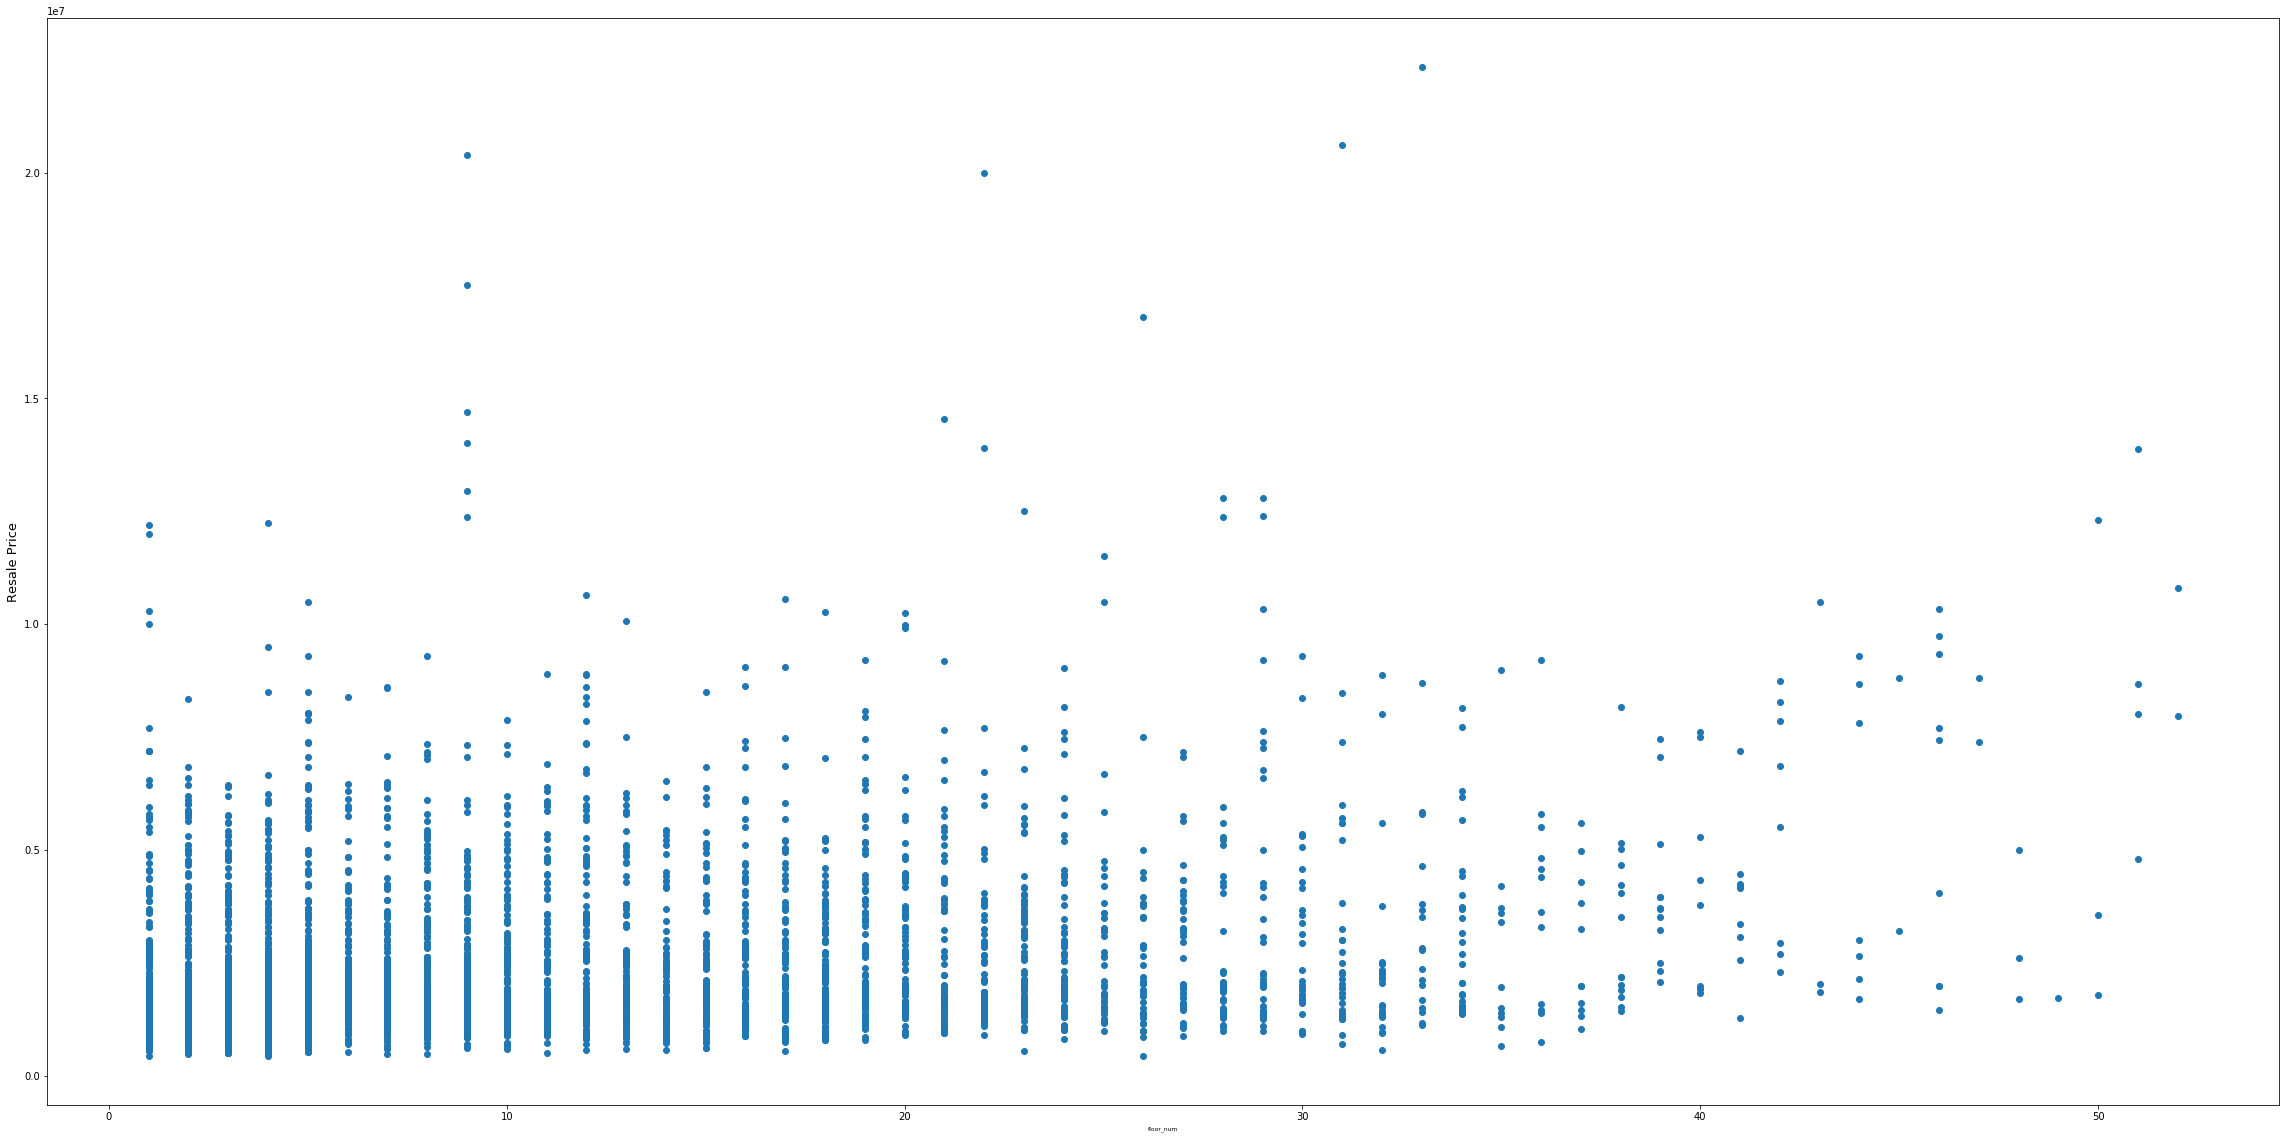

In [34]:
year = "2010"
xhead = 'floor_num'
fig, ax = plt.subplots(figsize=(40, 20))
ax.scatter(x =pri_train[pri_train.completion_date == year][xhead], y = pri_train[pri_train.completion_date == year]["price"])
plt.ylabel('Resale Price', fontsize = 13)
plt.xlabel(xhead, fontsize = 6)
plt.show()

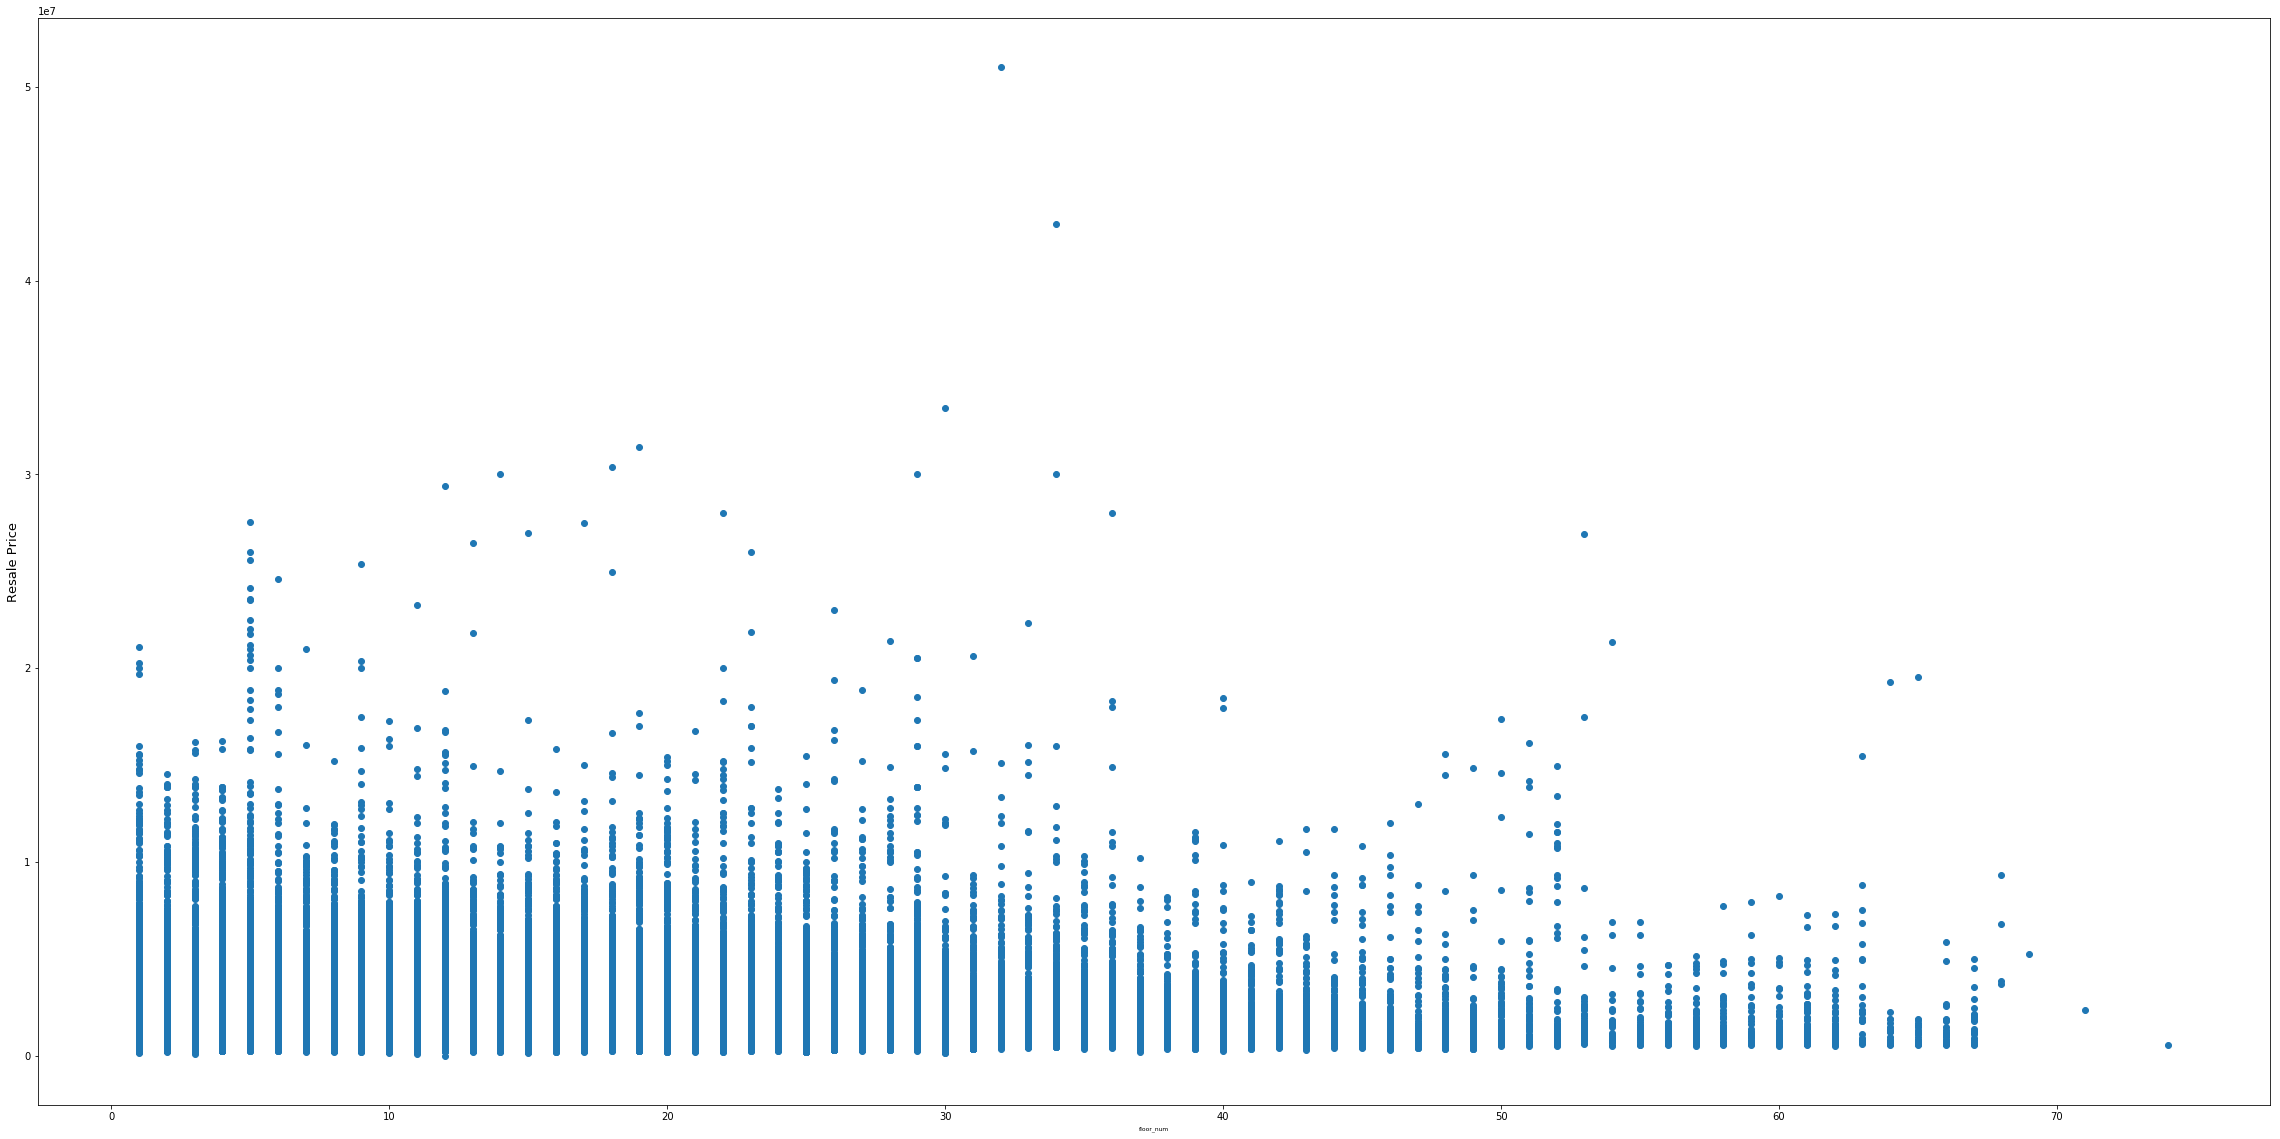

In [35]:
year = "2010"
xhead = 'floor_num'
fig, ax = plt.subplots(figsize=(40, 20))
ax.scatter(x =pri_train[xhead], y = pri_train["price"])
plt.ylabel('Resale Price', fontsize = 13)
plt.xlabel(xhead, fontsize = 6)
plt.show()

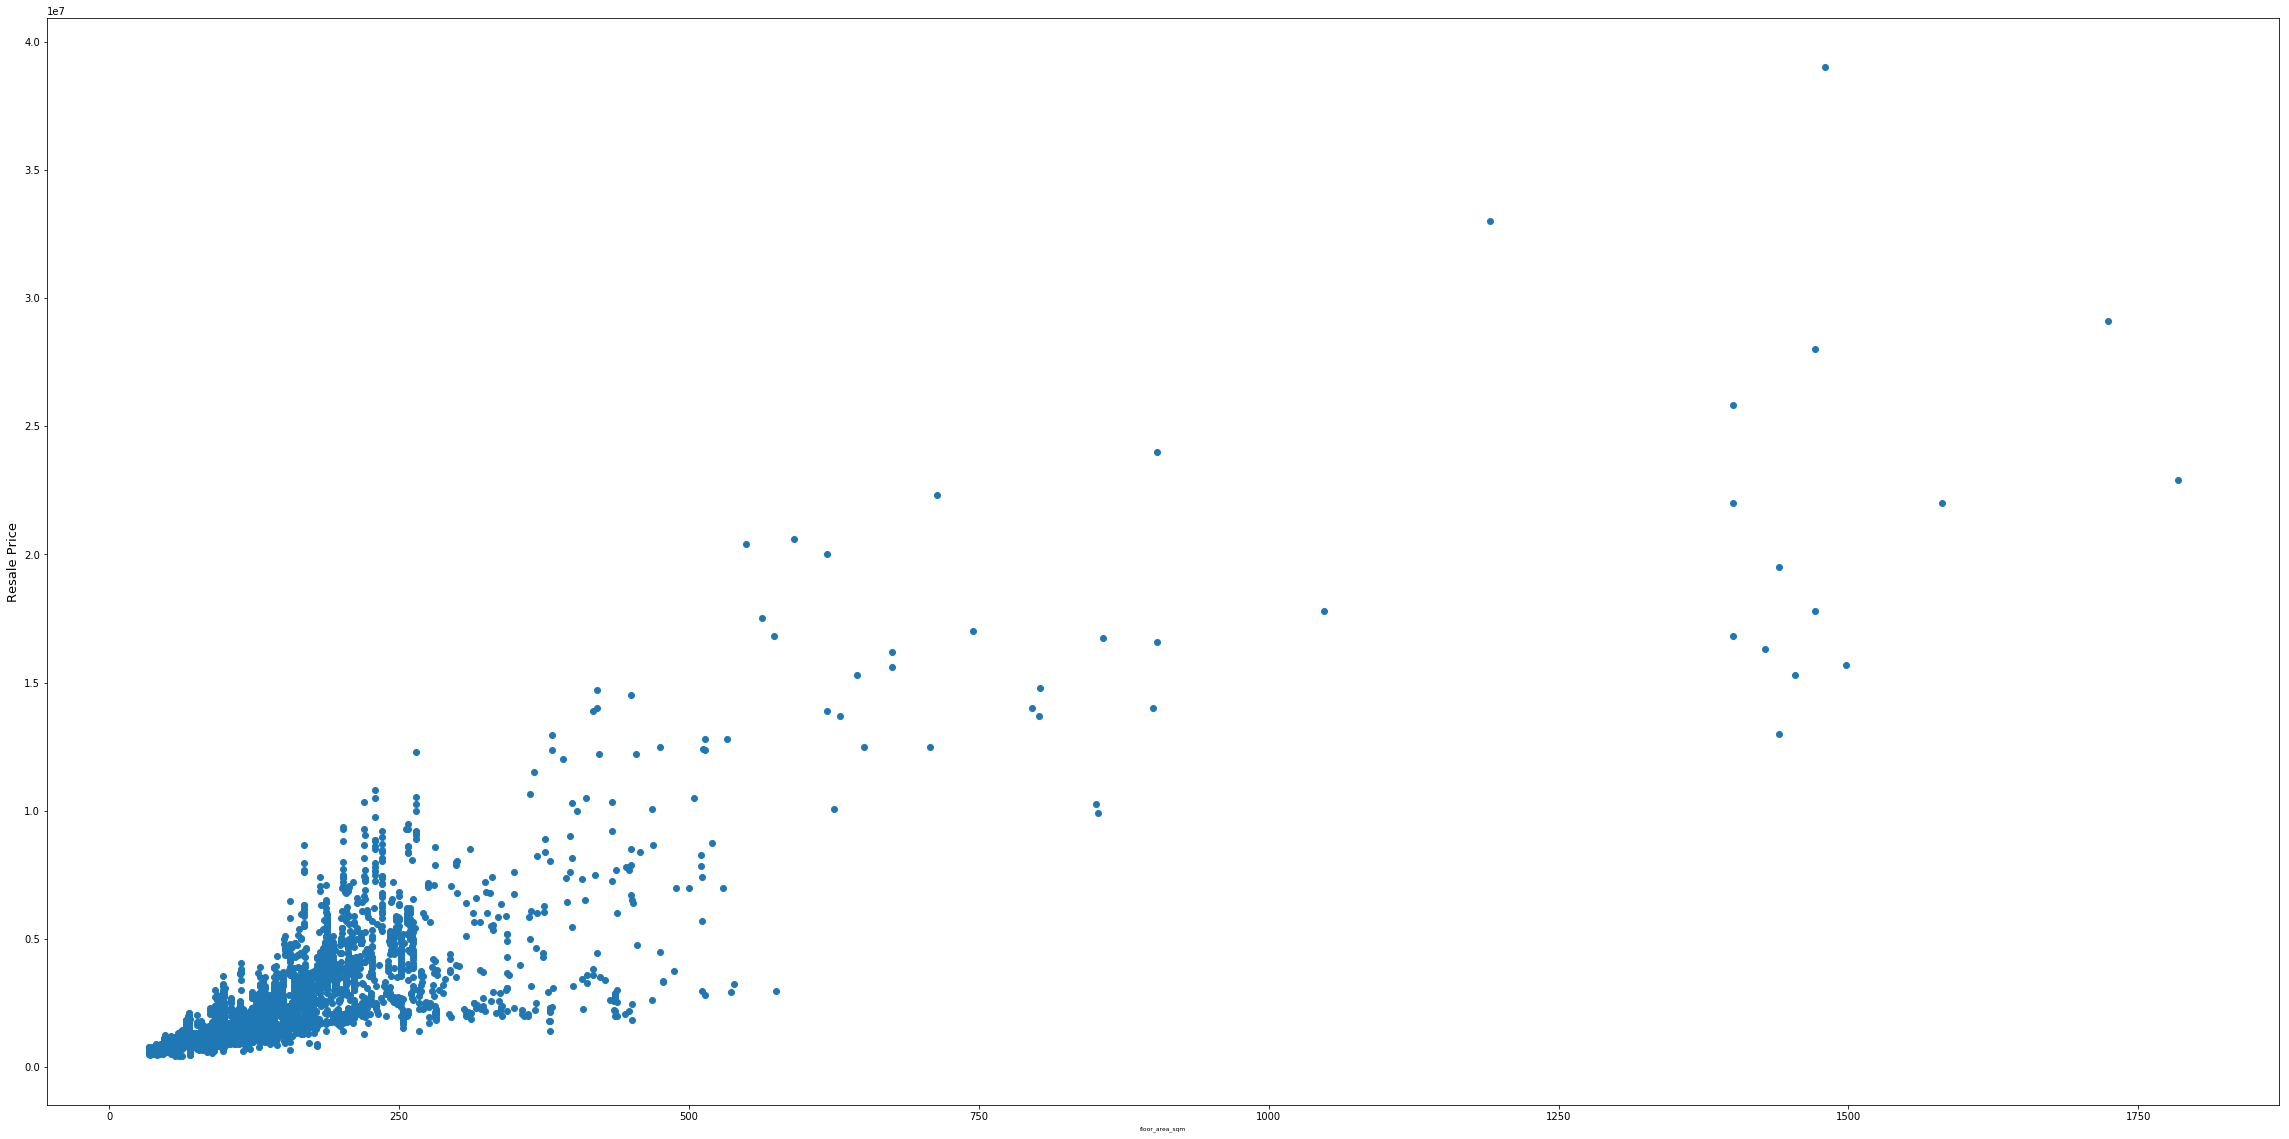

In [36]:
year = "2010"
xhead = 'floor_area_sqm'
fig, ax = plt.subplots(figsize=(40, 20))
ax.scatter(x =pri_train[pri_train.completion_date == year][xhead], y = pri_train[pri_train.completion_date == year]["price"])
plt.ylabel('Resale Price', fontsize = 13)
plt.xlabel(xhead, fontsize = 6)
plt.show()

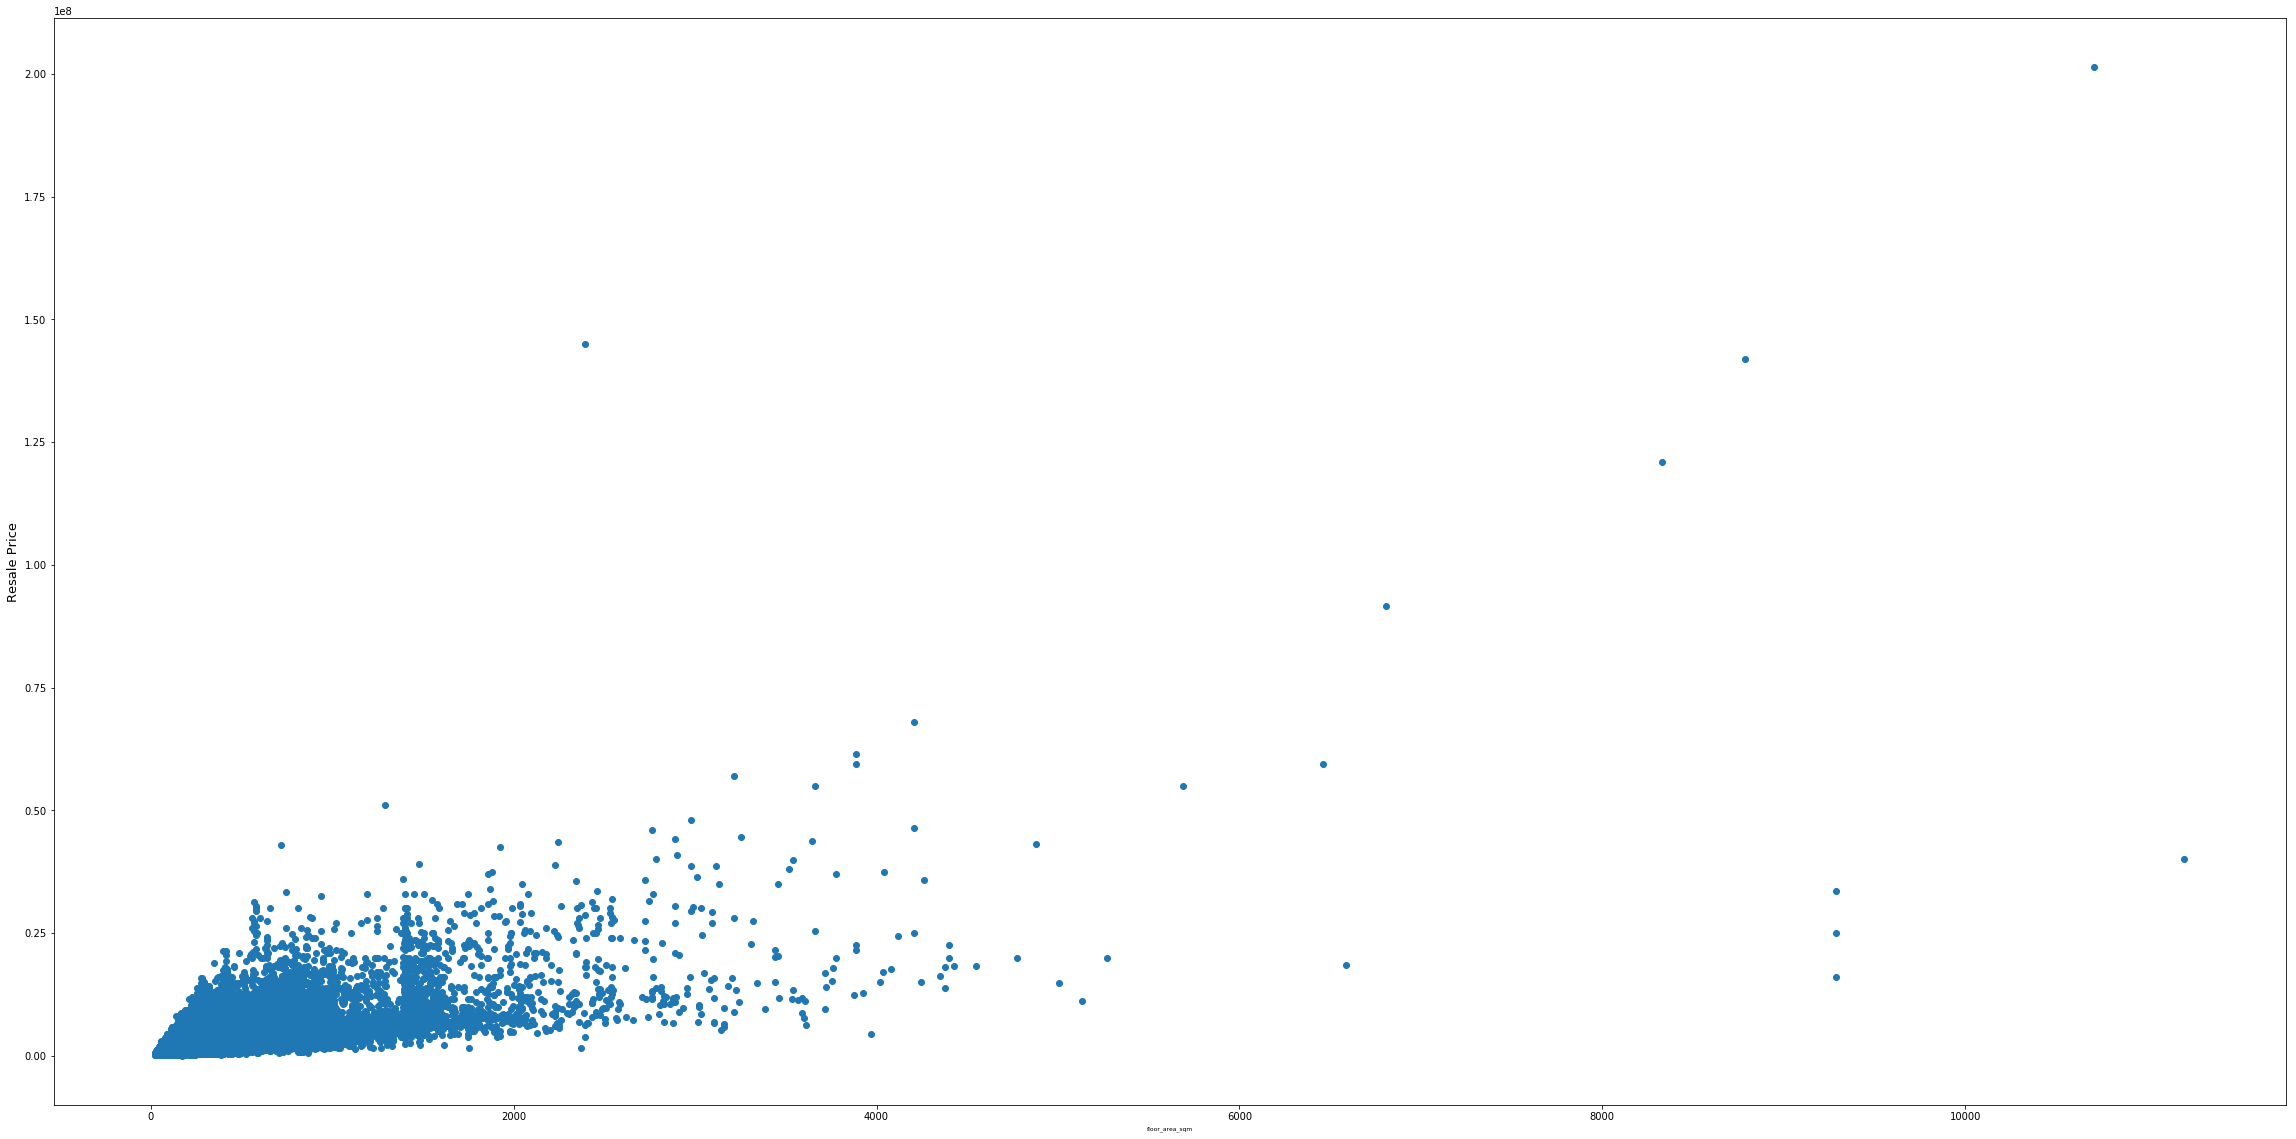

In [37]:
year = "2010"
xhead = 'floor_area_sqm'
fig, ax = plt.subplots(figsize=(40, 20))
ax.scatter(x =pri_train[xhead], y = pri_train["price"])
plt.ylabel('Resale Price', fontsize = 13)
plt.xlabel(xhead, fontsize = 6)
plt.show()

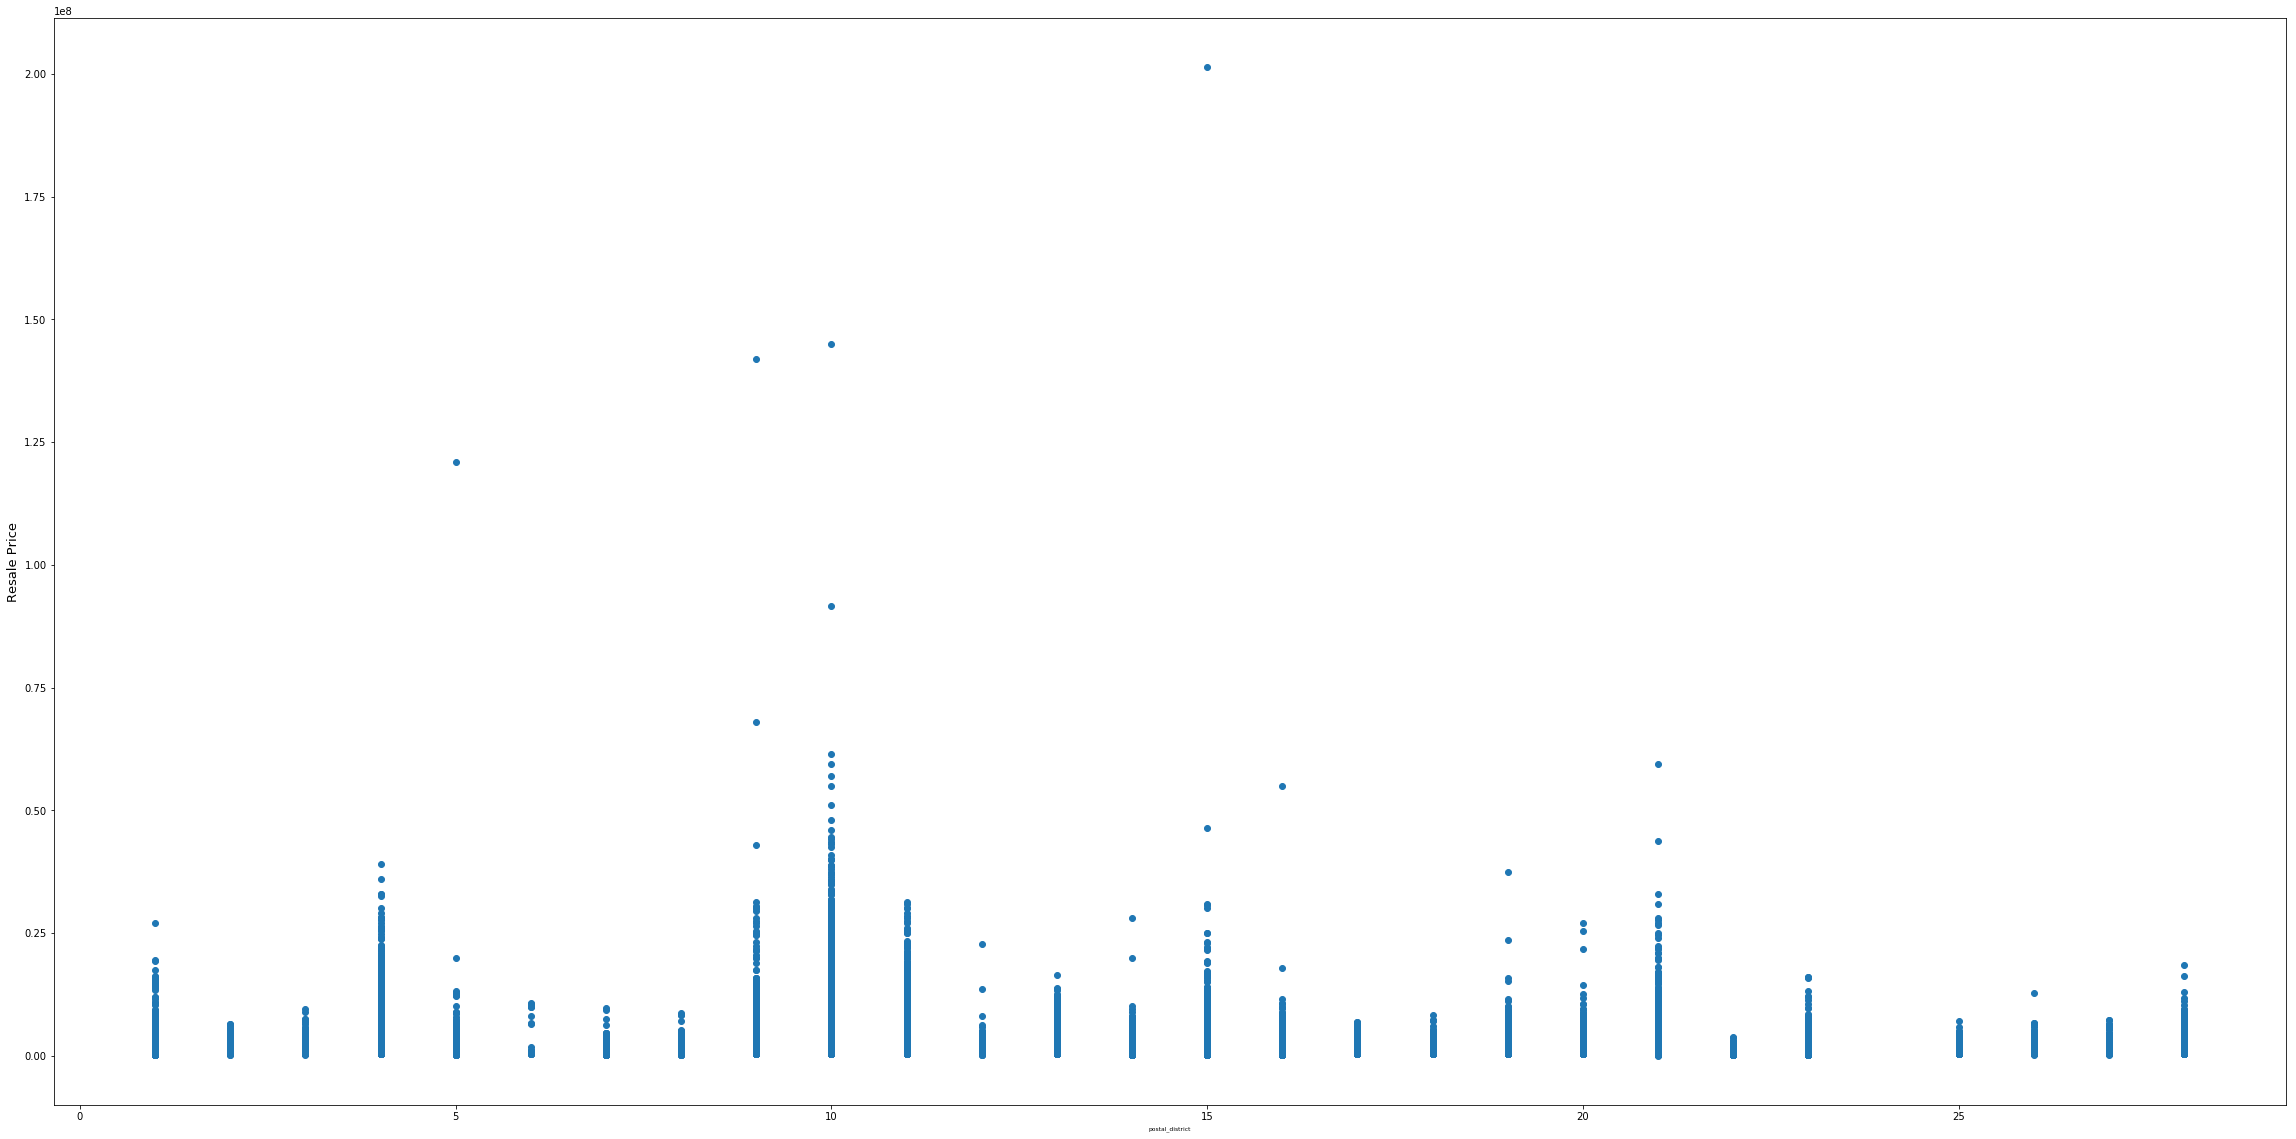

In [38]:
year = "2010"
xhead = 'postal_district'
fig, ax = plt.subplots(figsize=(40, 20))
ax.scatter(x =pri_train[xhead], y = pri_train["price"])
plt.ylabel('Resale Price', fontsize = 13)
plt.xlabel(xhead, fontsize = 6)
plt.show()

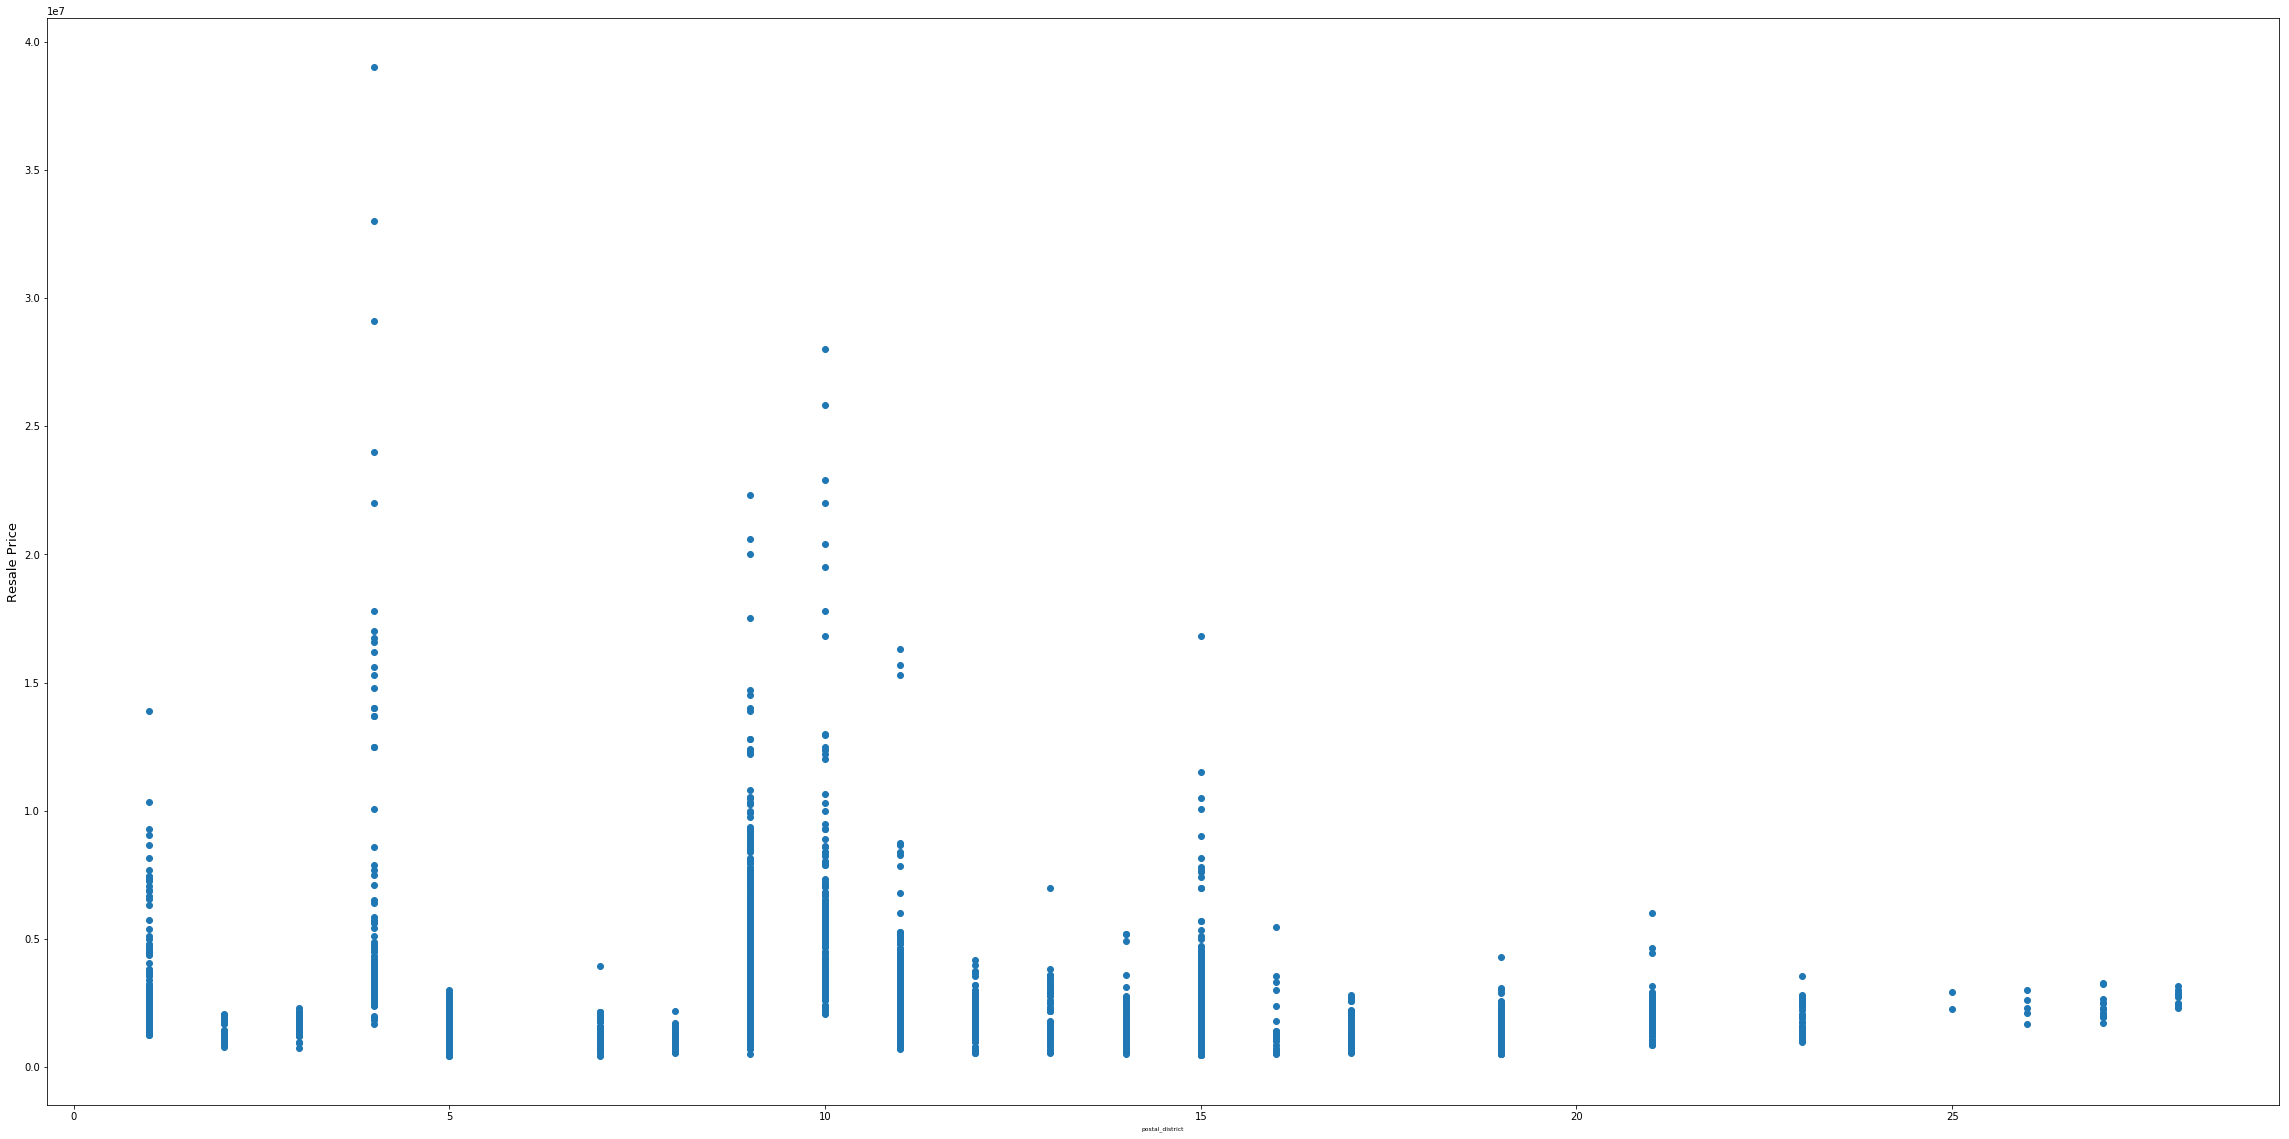

In [39]:
year = "2010"
xhead = 'postal_district'
fig, ax = plt.subplots(figsize=(40, 20))
ax.scatter(x =pri_train[pri_train.completion_date == year][xhead], y = pri_train[pri_train.completion_date == year]["price"])
plt.ylabel('Resale Price', fontsize = 13)
plt.xlabel(xhead, fontsize = 6)
plt.show()

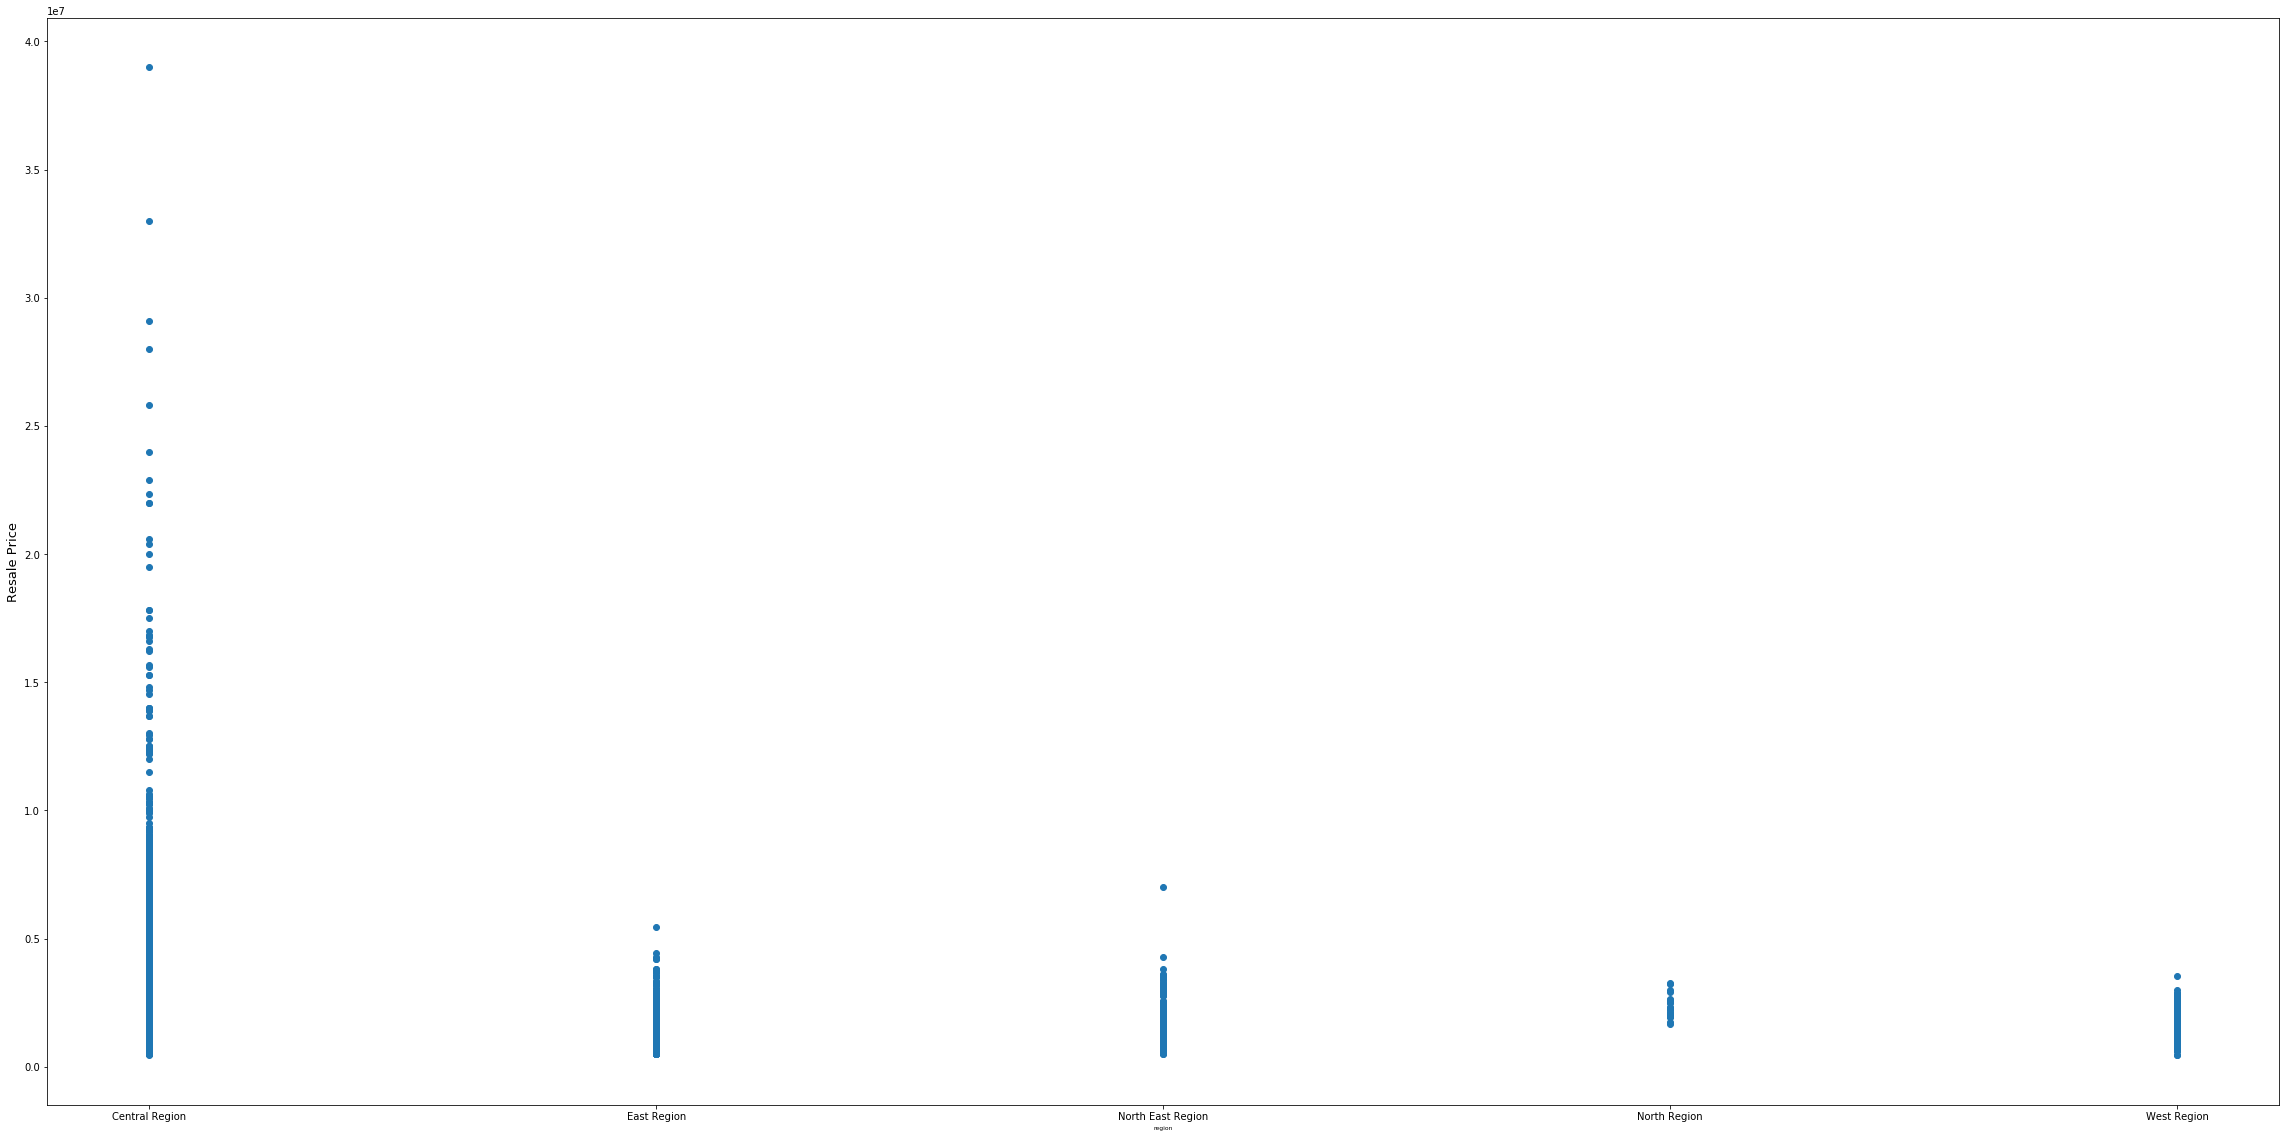

In [41]:
year = "2010"
xhead = 'region'
fig, ax = plt.subplots(figsize=(40, 20))
ax.scatter(x =pri_train[pri_train.completion_date == year][xhead], y = pri_train[pri_train.completion_date == year]["price"])
plt.ylabel('Resale Price', fontsize = 13)
plt.xlabel(xhead, fontsize = 6)
plt.show()

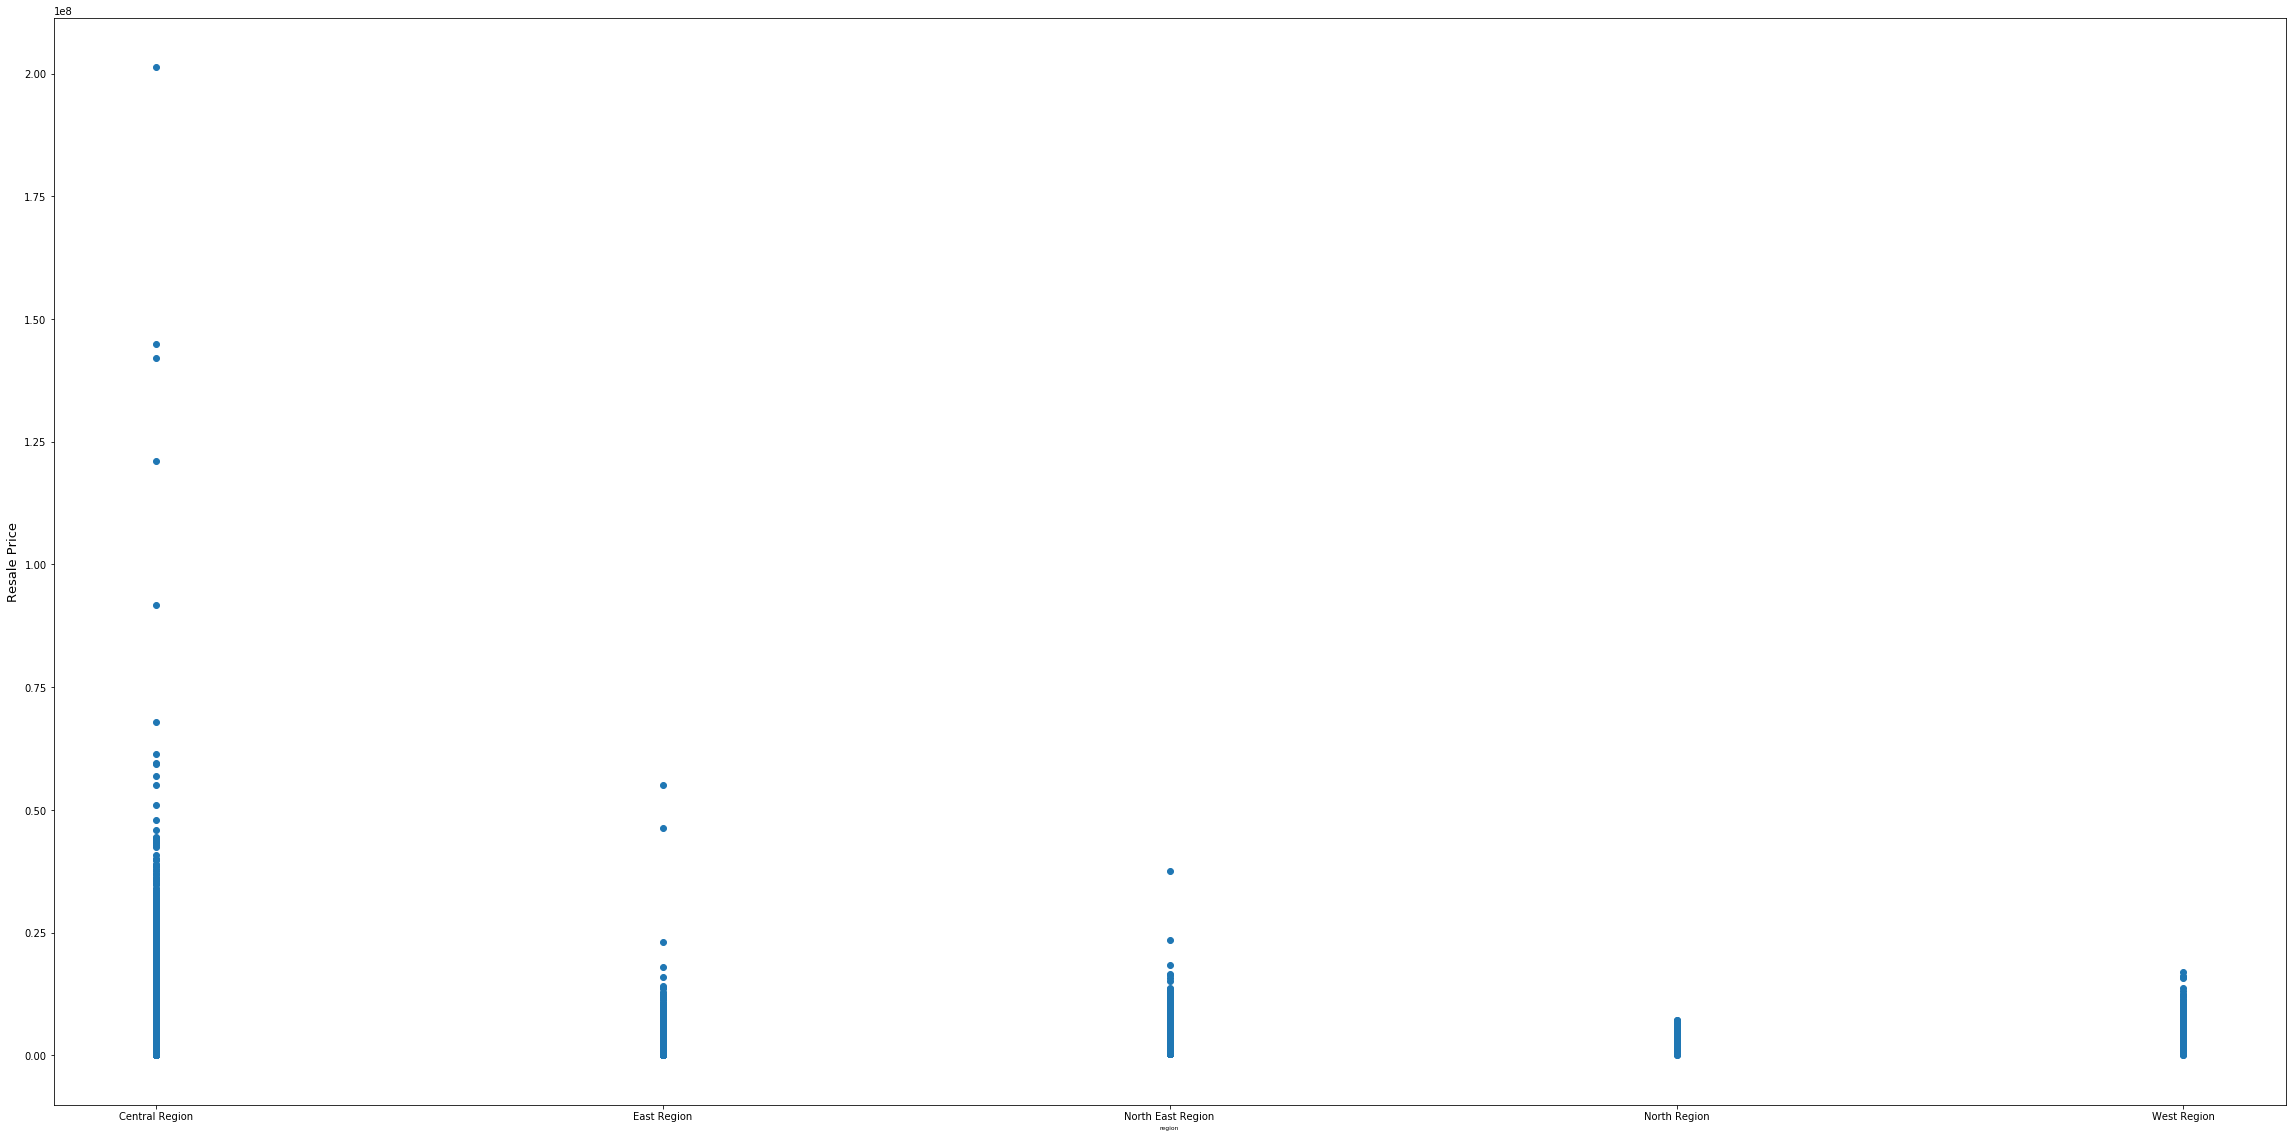

In [42]:
year = "2010"
xhead = 'region'
fig, ax = plt.subplots(figsize=(40, 20))
ax.scatter(x =pri_train[xhead], y = pri_train["price"])
plt.ylabel('Resale Price', fontsize = 13)
plt.xlabel(xhead, fontsize = 6)
plt.show()

## Cleaning
Features need to be extracted from the variables.
We also need to remove some variables like address.

In [43]:
# Extracting the year sold
pri_train['year_sold'] = pri_train.month.apply(get_year)
pri_test['year_sold'] = pri_test.month.apply(get_year)

In [44]:
def get_lease_len(date):
    x = re.match('^[0-9]{1,4}', date)
    if x :
      return(x.group())

# Extracting original lease len
pri_train['lease_len'] = pri_train.tenure.apply(get_lease_len)
pri_test['lease_len'] = pri_test.tenure.apply(get_lease_len)

In [45]:
def get_lease_start(date):
    x = re.findall(r"\d{4}$", date)
    return x

# Extracting lease start date
pri_train['lease_start_year'] = pri_train.tenure.apply(get_lease_start).apply(pd.Series)
pri_test['lease_start_year'] = pri_test.tenure.apply(get_lease_start).apply(pd.Series)

In [46]:
pri_train['lease_len'] = pri_train['lease_len'].fillna(9999)
pri_train['lease_start_year'] = pri_train['lease_start_year'].fillna(0)
pri_test['lease_len'] = pri_test['lease_len'].fillna(9999)
pri_test['lease_start_year'] = pri_test['lease_start_year'].fillna(0)
pri_train['lease_len']  = pri_train['lease_len'].apply(int)
pri_train['year_sold']  = pri_train['year_sold'].apply(int)
pri_train['lease_start_year']  = pri_train['lease_start_year'].apply(int)
pri_test['lease_len']  = pri_test['lease_len'].apply(int)
pri_test['year_sold']  = pri_test['year_sold'].apply(int)
pri_test['lease_start_year']  = pri_test['lease_start_year'].apply(int)

# Formula: lease length left = lease len - (year sold - lease start year)
# e.g. lease len: 99, year sold 2010, lease start year 1990
# 99 - (2010 - 1990)  = 79 years left
# for freehold: we set lease_len as 9999. the rest doesn't matter.
pri_train['lease_len_left'] = pri_train['lease_len'].subtract(pri_train['year_sold']).add(pri_train['lease_start_year'])
pri_test['lease_len_left'] = pri_test['lease_len'].subtract(pri_test['year_sold']).add(pri_test['lease_start_year'])

In [47]:
# if lease_len_left is negative, just set it to default 99
pri_train.loc[pri_train['lease_len_left']<0,'lease_len_left'] = 99
pri_test.loc[pri_test['lease_len_left']<0,'lease_len_left'] = 99

## Exploring latitude longitude
By playing around the different year_sold, different price cutoff, I came to several conclusion
- Prices have definitely changed a lot across the years and we must take into account 
- There are distinct clusters of lat, long on the map. (~17 to 20 of them)

Decides to use 20 clusters after looking at kmeans results for clusters from 15 to 20.

There are some anomaly in the latitude and longitude. We will ignore them for now.

In [48]:
print(pri_train.latitude.max())
print(pri_train.latitude.min())
print(pri_train.longitude.max())
print(pri_train.longitude.min())

52.161093
1.23819087114
103.976147204
0.125243


In [49]:
pri_train[pri_train.year_sold > 2015].price.describe()

count    4.012400e+04
mean     1.505122e+06
std      1.783550e+06
min      5.000000e+04
25%      8.441125e+05
50%      1.104638e+06
75%      1.584015e+06
max      1.450000e+08
Name: price, dtype: float64

Plotting latitude and longitude

In [55]:
p = figure(title="price based on geography", y_range=(1.27, 1.46), x_range = (103.68, 103.99),plot_width=900)
p.xaxis.axis_label = 'longitude'
p.yaxis.axis_label = 'latitude'
lowLat=pri_train['latitude'][pri_train.year_sold > 2015][pri_train.price < 850000]
lowLong=pri_train['longitude'][pri_train.year_sold > 2015][pri_train.price < 850000]
medLat=pri_train['latitude'][pri_train.year_sold > 2015][pri_train.price <= 1590000][pri_train.price >= 850000]
medLong=pri_train['longitude'][pri_train.year_sold > 2015][pri_train.price <= 1590000][pri_train.price >= 850000]
highLat=pri_train['latitude'][pri_train.year_sold > 2015][pri_train.price > 1590000]
highLong=pri_train['longitude'][pri_train.year_sold > 2015][pri_train.price > 1590000]
p.circle(lowLong,lowLat,size=3,color=terrain.as_hex()[1],fill_alpha=0.1,line_alpha=0.3,legend='low')
p.circle(medLong,medLat,size=3,color=plasma.as_hex()[9],fill_alpha=0.1,line_alpha=0.3,legend='med')
p.circle(highLong,highLat,size=3,color=plasma.as_hex()[5],fill_alpha=0.1,line_alpha=0.3,legend='high')
show(p, notebook_handle=True)

In [60]:
p = figure(title="price based on geography", y_range=(1.27, 1.46), x_range = (103.68, 103.99),plot_width=900)
p.xaxis.axis_label = 'longitude'
p.yaxis.axis_label = 'latitude'
lowLat=pri_train['latitude'][pri_train.year_sold > 2012][pri_train.price < 850000]
lowLong=pri_train['longitude'][pri_train.year_sold > 2012][pri_train.price < 850000]
medLat=pri_train['latitude'][pri_train.year_sold > 2012][pri_train.price <= 1590000][pri_train.price >= 850000]
medLong=pri_train['longitude'][pri_train.year_sold > 2012][pri_train.price <= 1590000][pri_train.price >= 850000]
highLat=pri_train['latitude'][pri_train.year_sold > 2012][pri_train.price > 1590000]
highLong=pri_train['longitude'][pri_train.year_sold > 2012][pri_train.price > 1590000]
p.circle(lowLong,lowLat,size=3,color=terrain.as_hex()[1],fill_alpha=0.1,line_alpha=0.3,legend='low')
p.circle(medLong,medLat,size=3,color=plasma.as_hex()[9],fill_alpha=0.1,line_alpha=0.3,legend='med')
p.circle(highLong,highLat,size=3,color=plasma.as_hex()[5],fill_alpha=0.1,line_alpha=0.3,legend='high')
show(p, notebook_handle=True)

## K-Means on LatLng

C:\Users\nhanw\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


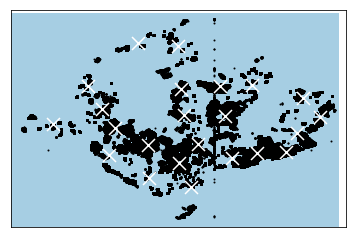

In [61]:
X=pd.concat([pri_train[pri_train['latitude'] <11][pri_train['longitude'] >77].latitude,\
             pri_train[pri_train['latitude'] <11][pri_train['longitude'] >77].longitude],axis=1)
kmeans = KMeans(n_clusters=23, random_state=0).fit(X)
X2 = pd.DataFrame(kmeans.labels_, columns=['cluster'])
result = pd.concat([X, X2], axis=1)
y_min, y_max = result['latitude'].min() - 0.01, result['latitude'].max() + 0.01
x_min, x_max = result['longitude'].min() - 0.01, result['longitude'].max() + 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(result['longitude'],result['latitude'], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 1], centroids[:, 0], 
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [62]:
pri_train["cluster"] = kmeans.predict(pri_train.loc[:,['latitude','longitude']])
pri_test["cluster"] = kmeans.predict(pri_test.loc[:,['latitude','longitude']])

# Give anomalies their own cluster
pri_train.loc[pri_train['latitude'] >11,'cluster']= 23
pri_train.loc[pri_train['longitude'] < 100,'cluster']= 23

In [63]:
# Variables to be kept separately
pri_train_id = pri_train['index']
pri_test_id = pri_test['index']
pri_train_price = pri_train['price']

# Variables to be dropped
to_drop = ['address', 'contract_date', "tenure", "postal_code","month","index", 'latitude','longitude']
pri_train = pri_train.drop(to_drop, axis=1)
pri_test = pri_test.drop(to_drop, axis=1)
pri_train = pri_train.drop(['price'], axis=1)

# Variables to become categorical before encoding them
#to_cat = ['postal_district', 'postal_sector', 'year_sold', 'lease_start_year', "cluster"]
to_cat = ['postal_district', 'postal_sector', 'year_sold', 'lease_start_year', 'lease_len', "cluster"]

# Variables to be label encoded
pri_train['lease_start_year']  = pri_train['lease_start_year'].apply(int)
pri_test['lease_len']  = pri_test['lease_len'].apply(int)
le = LabelEncoder()
#cat_var = ["project_name", "type_of_land", "property_type", "completion_date", \
#           "type_of_sale", "postal_district", "postal_sector", "region", \
#          "area", "year_sold","lease_start_year", "cluster"]

cat_var = ["project_name", "type_of_land", "property_type", "completion_date", \
           "type_of_sale", "postal_district", "postal_sector", "region", \
          "area", "year_sold","lease_start_year", "lease_len", "cluster"]

for i in range(len(cat_var)):
    le.fit(np.hstack((pri_train[cat_var[i]],pri_test[cat_var[i]])))
    pri_train[cat_var[i]] = le.transform(pri_train[cat_var[i]])
    pri_test[cat_var[i]] = le.transform(pri_test[cat_var[i]])



In [64]:
from sklearn.model_selection import train_test_split
pri_train_x, pri_val_x, pri_train_y, pri_val_y = train_test_split(pri_train, pri_train_price, test_size=0.15, random_state = 123)

In [65]:
pri_train_x.shape

(388705, 17)

## Building Model Arc

In [66]:
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Input, Flatten
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

## pri_model3

In [72]:
main_input = Input(shape = (17,), name = 'main_input')
emb = Embedding(256*8, output_dim = 64, input_length = 17)(main_input)
conv1d = Conv1D(filters = 32, kernel_size = 3, padding = 'valid')(emb)
bn = BatchNormalization()(conv1d)
sgconv1d = Activation('sigmoid')(bn)
conv1d_2 = Conv1D(filters = 32, kernel_size = 3, padding = 'valid')(sgconv1d)
bn2 = BatchNormalization()(conv1d_2)
sgconv1d_2 = Activation('sigmoid')(bn2)
#conv = Multiply()([conv1d, sgconv1d])
#pool = MaxPooling1D(pool_size = 32)(conv)
out = Flatten()(sgconv1d_2)
out = Dense(512, activation = 'relu')(out)
out = Dense(256, activation = 'relu')(out)

loss = Dense(1, activation = 'linear')(out)

model = Model(inputs = [main_input], outputs = [loss])
model.compile(loss='mean_absolute_percentage_error', optimizer = 'Adam', \
              metrics=['mean_squared_error', 'mean_absolute_percentage_error'])

In [71]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      (None, 17)                0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 17, 64)            131072    
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 15, 32)            6176      
_________________________________________________________________
batch_normalization_5 (Batch (None, 15, 32)            128       
_________________________________________________________________
activation_5 (Activation)    (None, 15, 32)            0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 13, 32)            3104      
_________________________________________________________________
batch_normalization_6 (Batch (None, 13, 32)            128       
__________

In [73]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=5, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001)
early_stopping =  EarlyStopping(monitor='val_loss', 
                                         min_delta=0, 
                                         patience=5, 
                                         verbose=1, 
                                         mode='auto')
history = model.fit(pri_train_x, pri_train_y, validation_data = (pri_val_x, pri_val_y), epochs = 1000,\
          batch_size = 128, callbacks=[learning_rate_reduction])

Train on 388705 samples, validate on 68595 samples
Epoch 1/1000
388705/388705 [==============================] - 29s 74us/step - loss: 53.7082 - mean_squared_error: 2499154207178.2783 - mean_absolute_percentage_error: 53.7082 - val_loss: 26.3353 - val_mean_squared_error: 2047296171325.1794 - val_mean_absolute_percentage_error: 26.3353
Epoch 2/1000
388705/388705 [==============================] - 27s 71us/step - loss: 41.3332 - mean_squared_error: 2252546550575.0747 - mean_absolute_percentage_error: 41.3332 - val_loss: 22.3795 - val_mean_squared_error: 1914140790209.6223 - val_mean_absolute_percentage_error: 22.3795
Epoch 3/1000
388705/388705 [==============================] - 28s 72us/step - loss: 36.0600 - mean_squared_error: 2098873896297.7251 - mean_absolute_percentage_error: 36.0600 - val_loss: 21.8915 - val_mean_squared_error: 1894060146019.4553 - val_mean_absolute_percentage_error: 21.8915
Epoch 4/1000
388705/388705 [==============================] - 28s 73us/step - loss: 29.5320

Epoch 58/1000
388705/388705 [==============================] - 27s 69us/step - loss: 9.5654 - mean_squared_error: 884302689831.1219 - mean_absolute_percentage_error: 9.5654 - val_loss: 9.4430 - val_mean_squared_error: 680081812061.5177 - val_mean_absolute_percentage_error: 9.4430
Epoch 59/1000
388705/388705 [==============================] - 27s 69us/step - loss: 9.5868 - mean_squared_error: 878989618518.1044 - mean_absolute_percentage_error: 9.5868 - val_loss: 9.1846 - val_mean_squared_error: 678719540559.9293 - val_mean_absolute_percentage_error: 9.1846
Epoch 60/1000
388705/388705 [==============================] - 27s 69us/step - loss: 9.3724 - mean_squared_error: 873196210746.1606 - mean_absolute_percentage_error: 9.3724 - val_loss: 9.1661 - val_mean_squared_error: 669477534775.4583 - val_mean_absolute_percentage_error: 9.1661
Epoch 61/1000
388705/388705 [==============================] - 27s 70us/step - loss: 9.3975 - mean_squared_error: 870194906167.6356 - mean_absolute_percentag

388705/388705 [==============================] - 29s 74us/step - loss: 7.7200 - mean_squared_error: 714176004667.3041 - mean_absolute_percentage_error: 7.7200 - val_loss: 7.7714 - val_mean_squared_error: 493880986593.0538 - val_mean_absolute_percentage_error: 7.7714
Epoch 117/1000
388705/388705 [==============================] - 29s 74us/step - loss: 8.1563 - mean_squared_error: 713923615983.4264 - mean_absolute_percentage_error: 8.1563 - val_loss: 9.9746 - val_mean_squared_error: 506387915584.0383 - val_mean_absolute_percentage_error: 9.9746
Epoch 118/1000
388705/388705 [==============================] - 28s 72us/step - loss: 8.1216 - mean_squared_error: 711971798617.4862 - mean_absolute_percentage_error: 8.1216 - val_loss: 8.5907 - val_mean_squared_error: 490246640493.2408 - val_mean_absolute_percentage_error: 8.5907
Epoch 119/1000
388705/388705 [==============================] - 28s 72us/step - loss: 7.6451 - mean_squared_error: 713088194001.8627 - mean_absolute_percentage_error: 7.

388705/388705 [==============================] - 29s 75us/step - loss: 6.5761 - mean_squared_error: 630918224661.4104 - mean_absolute_percentage_error: 6.5761 - val_loss: 7.0718 - val_mean_squared_error: 406111526247.7548 - val_mean_absolute_percentage_error: 7.0718
Epoch 175/1000
388705/388705 [==============================] - 29s 75us/step - loss: 6.5828 - mean_squared_error: 625377174510.0625 - mean_absolute_percentage_error: 6.5828 - val_loss: 7.1536 - val_mean_squared_error: 396436277556.6257 - val_mean_absolute_percentage_error: 7.1536
Epoch 176/1000
388705/388705 [==============================] - 29s 74us/step - loss: 6.6506 - mean_squared_error: 624005456972.5211 - mean_absolute_percentage_error: 6.6506 - val_loss: 7.2270 - val_mean_squared_error: 415522670731.0413 - val_mean_absolute_percentage_error: 7.2270
Epoch 177/1000
388705/388705 [==============================] - 29s 74us/step - loss: 6.5440 - mean_squared_error: 622786207230.8949 - mean_absolute_percentage_error: 6.

388705/388705 [==============================] - 27s 70us/step - loss: 5.7359 - mean_squared_error: 596455316948.9871 - mean_absolute_percentage_error: 5.7359 - val_loss: 6.8823 - val_mean_squared_error: 376099350042.6841 - val_mean_absolute_percentage_error: 6.8823
Epoch 229/1000
388705/388705 [==============================] - 27s 70us/step - loss: 5.6927 - mean_squared_error: 596195362090.2048 - mean_absolute_percentage_error: 5.6927 - val_loss: 6.8715 - val_mean_squared_error: 376880657102.7034 - val_mean_absolute_percentage_error: 6.8715
Epoch 230/1000
388705/388705 [==============================] - 27s 70us/step - loss: 5.7290 - mean_squared_error: 595675343025.8739 - mean_absolute_percentage_error: 5.7290 - val_loss: 6.8747 - val_mean_squared_error: 376816419682.5522 - val_mean_absolute_percentage_error: 6.8747
Epoch 231/1000
388705/388705 [==============================] - 27s 70us/step - loss: 5.6936 - mean_squared_error: 594899689780.2340 - mean_absolute_percentage_error: 5.

388705/388705 [==============================] - 27s 70us/step - loss: 5.5929 - mean_squared_error: 587476458090.7863 - mean_absolute_percentage_error: 5.5929 - val_loss: 6.8614 - val_mean_squared_error: 368857485545.4174 - val_mean_absolute_percentage_error: 6.8614
Epoch 287/1000
388705/388705 [==============================] - 27s 70us/step - loss: 5.6467 - mean_squared_error: 587590373173.1469 - mean_absolute_percentage_error: 5.6467 - val_loss: 6.8616 - val_mean_squared_error: 367841171810.6642 - val_mean_absolute_percentage_error: 6.8616
Epoch 288/1000
388705/388705 [==============================] - 27s 70us/step - loss: 5.5911 - mean_squared_error: 587740571724.6449 - mean_absolute_percentage_error: 5.5911 - val_loss: 6.8666 - val_mean_squared_error: 367400241951.8830 - val_mean_absolute_percentage_error: 6.8666
Epoch 289/1000
388705/388705 [==============================] - 27s 70us/step - loss: 5.6421 - mean_squared_error: 587145283541.7023 - mean_absolute_percentage_error: 5.

388705/388705 [==============================] - 27s 70us/step - loss: 5.5357 - mean_squared_error: 580922151460.9407 - mean_absolute_percentage_error: 5.5357 - val_loss: 6.8503 - val_mean_squared_error: 366795560137.4262 - val_mean_absolute_percentage_error: 6.8503
Epoch 345/1000
388705/388705 [==============================] - 27s 70us/step - loss: 5.5394 - mean_squared_error: 580441963895.6085 - mean_absolute_percentage_error: 5.5394 - val_loss: 6.8562 - val_mean_squared_error: 363897839792.8096 - val_mean_absolute_percentage_error: 6.8562
Epoch 346/1000
388705/388705 [==============================] - 27s 70us/step - loss: 5.5397 - mean_squared_error: 580190713645.6124 - mean_absolute_percentage_error: 5.5397 - val_loss: 6.8536 - val_mean_squared_error: 364889523244.7397 - val_mean_absolute_percentage_error: 6.8536
Epoch 347/1000
388705/388705 [==============================] - 27s 70us/step - loss: 5.5321 - mean_squared_error: 580868850886.5460 - mean_absolute_percentage_error: 5.

388705/388705 [==============================] - 27s 70us/step - loss: 5.4672 - mean_squared_error: 574324876268.1447 - mean_absolute_percentage_error: 5.4672 - val_loss: 6.8548 - val_mean_squared_error: 356373802269.1735 - val_mean_absolute_percentage_error: 6.8548
Epoch 403/1000
388705/388705 [==============================] - 27s 70us/step - loss: 5.4571 - mean_squared_error: 573814206596.7310 - mean_absolute_percentage_error: 5.4571 - val_loss: 6.8462 - val_mean_squared_error: 357259969625.5244 - val_mean_absolute_percentage_error: 6.8462
Epoch 404/1000
388705/388705 [==============================] - 27s 70us/step - loss: 5.4698 - mean_squared_error: 574929230888.0664 - mean_absolute_percentage_error: 5.4698 - val_loss: 6.8411 - val_mean_squared_error: 357475430670.9170 - val_mean_absolute_percentage_error: 6.8411
Epoch 405/1000
388705/388705 [==============================] - 27s 70us/step - loss: 5.4635 - mean_squared_error: 574073369350.3101 - mean_absolute_percentage_error: 5.

388705/388705 [==============================] - 27s 70us/step - loss: 5.4238 - mean_squared_error: 568413282149.3351 - mean_absolute_percentage_error: 5.4238 - val_loss: 6.8315 - val_mean_squared_error: 356110789748.6042 - val_mean_absolute_percentage_error: 6.8315
Epoch 461/1000
388705/388705 [==============================] - 27s 70us/step - loss: 5.3775 - mean_squared_error: 568031705160.8146 - mean_absolute_percentage_error: 5.3775 - val_loss: 6.8309 - val_mean_squared_error: 354752451478.1441 - val_mean_absolute_percentage_error: 6.8309
Epoch 462/1000
388705/388705 [==============================] - 27s 70us/step - loss: 5.4131 - mean_squared_error: 568367811715.1636 - mean_absolute_percentage_error: 5.4131 - val_loss: 6.8284 - val_mean_squared_error: 356043321248.5789 - val_mean_absolute_percentage_error: 6.8284
Epoch 463/1000
388705/388705 [==============================] - 27s 70us/step - loss: 5.3858 - mean_squared_error: 567842379187.6199 - mean_absolute_percentage_error: 5.

388705/388705 [==============================] - 27s 70us/step - loss: 5.3621 - mean_squared_error: 562192150453.9104 - mean_absolute_percentage_error: 5.3621 - val_loss: 6.8298 - val_mean_squared_error: 346605426967.4858 - val_mean_absolute_percentage_error: 6.8298
Epoch 519/1000
388705/388705 [==============================] - 27s 70us/step - loss: 5.3092 - mean_squared_error: 562773658524.4543 - mean_absolute_percentage_error: 5.3092 - val_loss: 6.8270 - val_mean_squared_error: 348276812078.5349 - val_mean_absolute_percentage_error: 6.8270
Epoch 520/1000
388705/388705 [==============================] - 27s 70us/step - loss: 5.3688 - mean_squared_error: 563306089887.2311 - mean_absolute_percentage_error: 5.3688 - val_loss: 6.8303 - val_mean_squared_error: 347178174841.3551 - val_mean_absolute_percentage_error: 6.8303
Epoch 521/1000
388705/388705 [==============================] - 27s 70us/step - loss: 5.3064 - mean_squared_error: 562840547774.9926 - mean_absolute_percentage_error: 5.

388705/388705 [==============================] - 27s 70us/step - loss: 5.2961 - mean_squared_error: 558059378176.2068 - mean_absolute_percentage_error: 5.2961 - val_loss: 6.8220 - val_mean_squared_error: 344984301381.8752 - val_mean_absolute_percentage_error: 6.8220
Epoch 577/1000
388705/388705 [==============================] - 27s 70us/step - loss: 5.2577 - mean_squared_error: 557243269920.0953 - mean_absolute_percentage_error: 5.2577 - val_loss: 6.8245 - val_mean_squared_error: 343313041251.2240 - val_mean_absolute_percentage_error: 6.8245
Epoch 578/1000
388705/388705 [==============================] - 27s 70us/step - loss: 5.3068 - mean_squared_error: 556964248761.0421 - mean_absolute_percentage_error: 5.3068 - val_loss: 6.8180 - val_mean_squared_error: 349819853922.0932 - val_mean_absolute_percentage_error: 6.8180
Epoch 579/1000
388705/388705 [==============================] - 27s 70us/step - loss: 5.2553 - mean_squared_error: 557781816467.6813 - mean_absolute_percentage_error: 5.

388705/388705 [==============================] - 27s 70us/step - loss: 5.2283 - mean_squared_error: 552923565913.3064 - mean_absolute_percentage_error: 5.2283 - val_loss: 6.8169 - val_mean_squared_error: 340159036526.7523 - val_mean_absolute_percentage_error: 6.8169
Epoch 635/1000
388705/388705 [==============================] - 27s 70us/step - loss: 5.2226 - mean_squared_error: 551885567982.8922 - mean_absolute_percentage_error: 5.2226 - val_loss: 6.8194 - val_mean_squared_error: 344016073255.0895 - val_mean_absolute_percentage_error: 6.8194
Epoch 636/1000
388705/388705 [==============================] - 27s 70us/step - loss: 5.2325 - mean_squared_error: 552654238581.4812 - mean_absolute_percentage_error: 5.2325 - val_loss: 6.8113 - val_mean_squared_error: 339970745066.4101 - val_mean_absolute_percentage_error: 6.8113
Epoch 637/1000
388705/388705 [==============================] - 27s 70us/step - loss: 5.2048 - mean_squared_error: 552429555440.3813 - mean_absolute_percentage_error: 5.

388705/388705 [==============================] - 27s 70us/step - loss: 5.1537 - mean_squared_error: 547474965051.8784 - mean_absolute_percentage_error: 5.1537 - val_loss: 6.8111 - val_mean_squared_error: 337501836464.5260 - val_mean_absolute_percentage_error: 6.8111
Epoch 693/1000
388705/388705 [==============================] - 27s 70us/step - loss: 5.1966 - mean_squared_error: 547837047673.9281 - mean_absolute_percentage_error: 5.1966 - val_loss: 6.8117 - val_mean_squared_error: 338735057901.6533 - val_mean_absolute_percentage_error: 6.8117
Epoch 694/1000
388705/388705 [==============================] - 27s 70us/step - loss: 5.1528 - mean_squared_error: 548659417172.3215 - mean_absolute_percentage_error: 5.1528 - val_loss: 6.8142 - val_mean_squared_error: 337406187718.7541 - val_mean_absolute_percentage_error: 6.8142
Epoch 695/1000
388705/388705 [==============================] - 27s 70us/step - loss: 5.1908 - mean_squared_error: 548043335146.6469 - mean_absolute_percentage_error: 5.

388705/388705 [==============================] - 27s 70us/step - loss: 5.0953 - mean_squared_error: 543581036773.6133 - mean_absolute_percentage_error: 5.0953 - val_loss: 6.8031 - val_mean_squared_error: 332967051061.3347 - val_mean_absolute_percentage_error: 6.8031
Epoch 751/1000
388705/388705 [==============================] - 27s 70us/step - loss: 5.1494 - mean_squared_error: 544579576738.3712 - mean_absolute_percentage_error: 5.1494 - val_loss: 6.8069 - val_mean_squared_error: 333199080919.0594 - val_mean_absolute_percentage_error: 6.8069
Epoch 752/1000
388705/388705 [==============================] - 27s 70us/step - loss: 5.1053 - mean_squared_error: 543556045550.9851 - mean_absolute_percentage_error: 5.1053 - val_loss: 6.8076 - val_mean_squared_error: 334496043908.5886 - val_mean_absolute_percentage_error: 6.8076
Epoch 753/1000
388705/388705 [==============================] - 27s 70us/step - loss: 5.1513 - mean_squared_error: 544778862120.2969 - mean_absolute_percentage_error: 5.

388705/388705 [==============================] - 27s 70us/step - loss: 5.0519 - mean_squared_error: 539310364094.6527 - mean_absolute_percentage_error: 5.0519 - val_loss: 6.7984 - val_mean_squared_error: 332268064517.6242 - val_mean_absolute_percentage_error: 6.7984
Epoch 809/1000
388705/388705 [==============================] - 27s 70us/step - loss: 5.1053 - mean_squared_error: 539301009553.5895 - mean_absolute_percentage_error: 5.1053 - val_loss: 6.8226 - val_mean_squared_error: 331815306945.9398 - val_mean_absolute_percentage_error: 6.8226
Epoch 810/1000
388705/388705 [==============================] - 27s 70us/step - loss: 5.0565 - mean_squared_error: 539852127720.2286 - mean_absolute_percentage_error: 5.0565 - val_loss: 6.7989 - val_mean_squared_error: 331200459859.0157 - val_mean_absolute_percentage_error: 6.7989
Epoch 811/1000
388705/388705 [==============================] - 27s 70us/step - loss: 5.1070 - mean_squared_error: 539055886807.4713 - mean_absolute_percentage_error: 5.

388705/388705 [==============================] - 27s 70us/step - loss: 5.0451 - mean_squared_error: 534770857574.1919 - mean_absolute_percentage_error: 5.0451 - val_loss: 6.7995 - val_mean_squared_error: 327657783793.7062 - val_mean_absolute_percentage_error: 6.7995
Epoch 867/1000
388705/388705 [==============================] - 27s 70us/step - loss: 5.0300 - mean_squared_error: 536250526281.8617 - mean_absolute_percentage_error: 5.0300 - val_loss: 6.8022 - val_mean_squared_error: 330163555170.8807 - val_mean_absolute_percentage_error: 6.8022
Epoch 868/1000
388705/388705 [==============================] - 27s 70us/step - loss: 5.0362 - mean_squared_error: 535354034734.5272 - mean_absolute_percentage_error: 5.0362 - val_loss: 6.8081 - val_mean_squared_error: 325947988105.9067 - val_mean_absolute_percentage_error: 6.8081
Epoch 869/1000
388705/388705 [==============================] - 27s 70us/step - loss: 5.0358 - mean_squared_error: 534768447065.5178 - mean_absolute_percentage_error: 5.

388705/388705 [==============================] - 27s 70us/step - loss: 5.0103 - mean_squared_error: 532396653354.6171 - mean_absolute_percentage_error: 5.0103 - val_loss: 6.8147 - val_mean_squared_error: 322159487606.5971 - val_mean_absolute_percentage_error: 6.8147
Epoch 925/1000
388705/388705 [==============================] - 27s 70us/step - loss: 4.9767 - mean_squared_error: 532001263571.6475 - mean_absolute_percentage_error: 4.9767 - val_loss: 6.8140 - val_mean_squared_error: 323354716472.0293 - val_mean_absolute_percentage_error: 6.8140
Epoch 926/1000
388705/388705 [==============================] - 27s 70us/step - loss: 5.0044 - mean_squared_error: 531697772775.0464 - mean_absolute_percentage_error: 5.0044 - val_loss: 6.7993 - val_mean_squared_error: 326842157482.7375 - val_mean_absolute_percentage_error: 6.7993
Epoch 927/1000
388705/388705 [==============================] - 27s 70us/step - loss: 4.9776 - mean_squared_error: 532220415796.3144 - mean_absolute_percentage_error: 4.

388705/388705 [==============================] - 28s 73us/step - loss: 4.9679 - mean_squared_error: 527927948078.2263 - mean_absolute_percentage_error: 4.9679 - val_loss: 6.8088 - val_mean_squared_error: 320613409519.9037 - val_mean_absolute_percentage_error: 6.8088
Epoch 983/1000
388705/388705 [==============================] - 28s 73us/step - loss: 4.9424 - mean_squared_error: 527049599604.5177 - mean_absolute_percentage_error: 4.9424 - val_loss: 6.8068 - val_mean_squared_error: 320487391057.3998 - val_mean_absolute_percentage_error: 6.8068
Epoch 984/1000
388705/388705 [==============================] - 29s 74us/step - loss: 4.9646 - mean_squared_error: 527676408015.4055 - mean_absolute_percentage_error: 4.9646 - val_loss: 6.8025 - val_mean_squared_error: 324468601061.9540 - val_mean_absolute_percentage_error: 6.8025
Epoch 985/1000
388705/388705 [==============================] - 29s 74us/step - loss: 4.9277 - mean_squared_error: 529075391283.5214 - mean_absolute_percentage_error: 4.

In [80]:
print(history.history.keys())

dict_keys(['val_loss', 'val_mean_squared_error', 'val_mean_absolute_percentage_error', 'loss', 'mean_squared_error', 'mean_absolute_percentage_error', 'lr'])


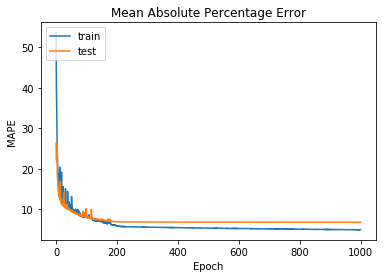

In [83]:
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Mean Absolute Percentage Error')
plt.ylabel('MAPE')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Prediction

In [ ]:
pri_out = model.predict(pri_test)
pri_out =pd.DataFrame(data={'index': pri_test_id,'price': pri_out.ravel()})
pri_out.to_csv(r"C:\Users\nhanw\OneDrive\Desktop\leeweesun_kaggle_2\outputs\pri_out.csv", index =False)
hdb_out = pd.read_csv(r"C:\Users\nhanw\OneDrive\Desktop\leeweesun_kaggle_2\outputs\hdb_out.csv")
pd.concat([pri_out, hdb_out]).to_csv(r"C:\Users\nhanw\OneDrive\Desktop\leeweesun_kaggle_2\outputs\comb_out.csv",index=False)